In [5]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import numpy as np
import time

In [8]:
from Optimisers.Optimiser import Optimiser

Defining Ackley

In [9]:
def ackley(*args):
    y = np.outer(np.linspace(-10, 10, 100), np.ones(100))
    x = y.copy().T
    try:
        a = args[0]
        b = args[1]
        c = args[2]
    except:
        a = args[0][0]
        b = args[0][1]
        c = args[0][2]
    val = -a*np.exp(-b*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(c*x)+np.cos(c*y))) + a + np.exp(1)
    return val.flatten()

In [10]:
def distance(inp):
    y = np.outer(np.linspace(-10, 10, 100), np.ones(100))
    x = y.copy().T
    a = 20
    b = 0.2
    c = 2*3.14
    val = -a*np.exp(-b*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(c*x)+np.cos(c*y))) + a + np.exp(1)
    sub = np.subtract(inp, val.flatten())
    met = np.square(sub).sum(axis=0)#.sum(axis=1)
    return -met/10000

def prior(params):
    if ((params[0]<10) or (params[0]>30)):
        return 0
    if ((params[1]<0) or (params[1]>1)):
        return 0
    if ((params[2]<0.5*3.14) or (params[2]>3*3.14)):
        return 0
    return 1

In [92]:
opt = Optimiser(method = "MCMC")
opt.define_alpha_function(ackley)
opt.define_optim_function(distance)
opt.define_prior(prior)
opt.define_guess(guess = [12,0.4,3.14])
opt.define_iterations(10000)
opt.define_lower_and_upper_limit(0,30)
mc, rs = opt.optimise()

In [76]:
opt.return_results()

,params,metric_val
0,"[18.887964794332238, 0.22523250723658195, 6.23...",-0.044283
1,"[20.803846418381806, 0.18067534930912416, 6.25...",-0.057511
2,"[18.583413491450415, 0.2322534058124941, 6.329...",-0.077209
3,"[18.45204846416309, 0.23341296298830883, 6.323...",-0.080980
4,"[20.365638320726735, 0.20262953275946807, 6.23...",-0.133412
...,...,...
9995,"[29.681950530807242, 0.9755138988806628, 1.931...",-260.853918
9996,"[29.78459658167941, 0.9392368759704445, 5.8086...",-262.095312
9997,"[29.78459658167941, 0.9392368759704445, 5.8086...",-262.095312
9998,"[29.887032234669043, 0.9193703922343839, 1.659...",-265.584059


Plotting Ackley

In [17]:

import plotly.graph_objects as go
import numpy as np

y = np.outer(np.linspace(-10, 10, 100), np.ones(100))
x = y.copy().T
z = ackley(20,0.2,2*3.14).reshape(100,100)

for i in range(1000):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.plot_wireframe(x, y, z,edgecolor ='black', rstride=10, cstride=10)
    ax.plot_surface(x, y, ackley(mc.analyse_results(rs, top_n=1000)[0][i]).reshape(100,100),edgecolor ='none', alpha=0.5)
    ax.set_zlim(0,30)
    ax.view_init(30, 45)
    plt.savefig(f"{i}.jpg")


KeyboardInterrupt



Error in callback <function flush_figures at 0x000002738FA6E8B0> (for post_execute):



KeyboardInterrupt



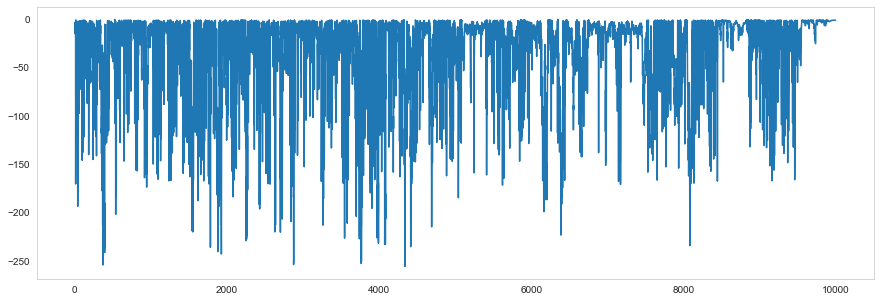

In [93]:
from Utils.utils import plot_convergence_MCMC
plot_convergence_MCMC(rs)

In [1]:
import cv2
import numpy as np
import glob
import os

img_array = []
for filename in glob.glob('*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    os.remove(filename)

out = cv2.VideoWriter('Ackley.avi',cv2.VideoWriter_fourcc(*'MJPG'), 5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

Multiple Starting Points Test

In [95]:
opt = Optimiser(method = "MCMC")
opt.define_alpha_function(ackley)
opt.define_optim_function(distance)
opt.define_prior(prior)
opt.define_guess(guess = [[12,0.4,3.14], [25, 0.1, 5.41], [18, 0.8, 2.98], [21, 0.23, 6.37], [15.49, 0.11, 4.11]])
opt.define_iterations(2000)
opt.define_lower_and_upper_limit(0,30)
mc, rs = opt.optimise(parallelize=False)

In [78]:
opt.return_results()

,params,metric_val
0,"[18.032336575970284, 0.23797903997193126, 6.26...",-0.131612
1,"[21.244463226780383, 0.1785646126460972, 6.155...",-0.204804
2,"[24.97971524131417, 0.13538346704340448, 6.278...",-0.225718
3,"[18.064114624136344, 0.2500960177321484, 6.394...",-0.258641
4,"[21.741706074749757, 0.16935275390343577, 6.43...",-0.295157
...,...,...
9995,"[29.909845452534736, 0.7771552475639779, 3.878...",-249.889718
9996,"[29.435565091922918, 0.9103181589380892, 7.281...",-249.923344
9997,"[29.90708723680179, 0.7849316703567719, 7.2781...",-251.955578
9998,"[29.707850876957757, 0.8412147246338059, 4.297...",-252.010494


Plotting Ackley

In [ ]:

import plotly.graph_objects as go
import numpy as np

y = np.outer(np.linspace(-10, 10, 100), np.ones(100))
x = y.copy().T
z = ackley(20,0.2,2*3.14).reshape(100,100)

for start_point in range(len(mc)):
    for i in range(1000):
        fig = plt.figure(figsize =(14, 9))
        ax = plt.axes(projection ='3d')
        ax.plot_wireframe(x, y, z,edgecolor ='black', rstride=10, cstride=10)
        ax.plot_surface(x, y, ackley(mc[start_point].analyse_results(rs, top_n=1000)[0][i]).reshape(100,100),edgecolor ='none', alpha=0.5)
        ax.set_zlim(0,30)
        ax.view_init(30, 45)
        plt.savefig(f"{i}.jpg")

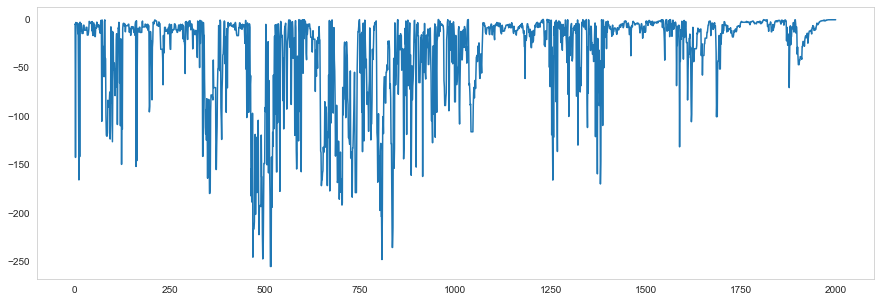

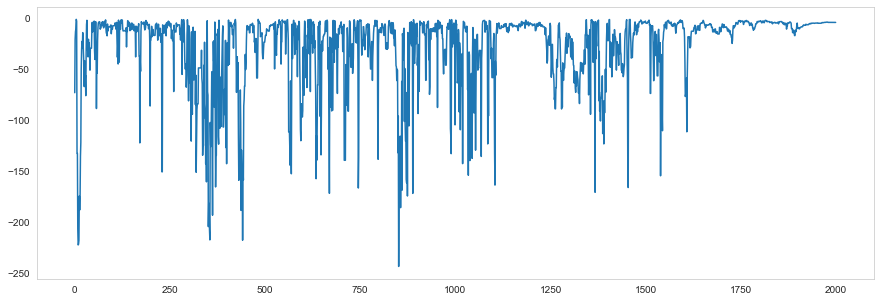

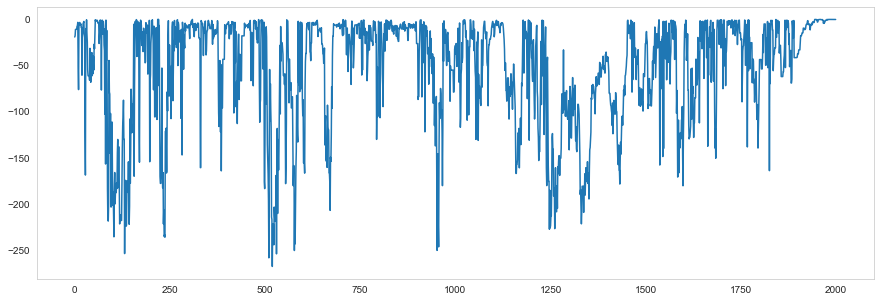

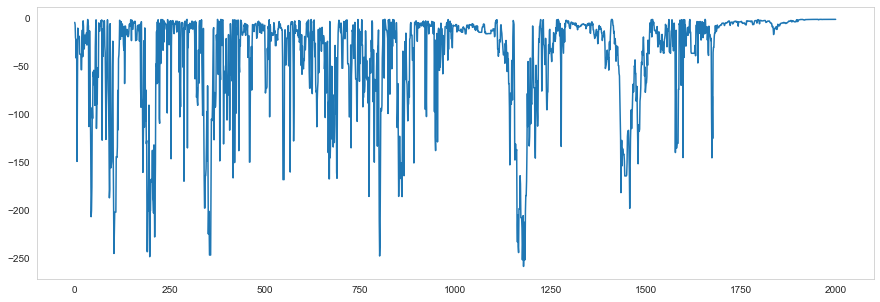

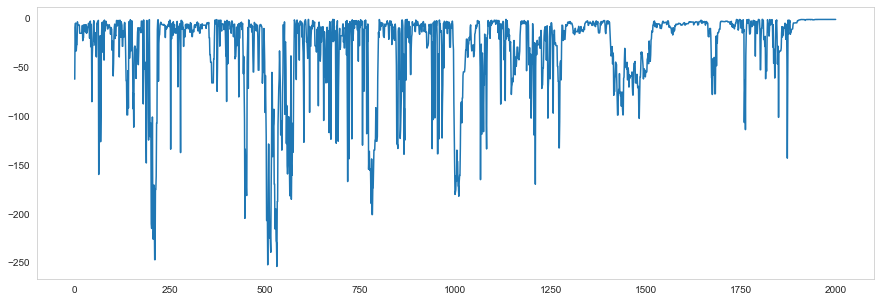

In [96]:
from Utils.utils import plot_convergence_MCMC
plot_convergence_MCMC(rs, overlap=False)

In [ ]:
import cv2
import numpy as np
import glob
import os

img_array = []
for filename in glob.glob('*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    os.remove(filename)

out = cv2.VideoWriter('Ackley.avi',cv2.VideoWriter_fourcc(*'MJPG'), 5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()
